17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/3
157/157 [==============================] - 70s 391ms/step - loss: 0.6811 - accuracy: 0.5620 - val_loss: 0.6070 - val_accuracy: 0.6682
Epoch 2/3
157/157 [==============================] - 52s 334ms/step - loss: 0.4587 - accuracy: 0.7955 - val_loss: 0.4655 - val_accuracy: 0.7848
Epoch 3/3
196/196 [==============================] - 5s 24ms/step - loss: 0.5488 - accuracy: 0.7120
Epoch 1/3
157/157 [==============================] - 23s 130ms/step - loss: 0.4707 - accuracy: 0.7595 - val_loss: 0.3220 - val_accuracy: 0.8722
Epoch 2/3
157/157 [==============================] - 10s 63ms/step - loss: 0.2754 - accuracy: 0.8889 - val_loss: 0.3194 - val_accuracy: 0.8704
Epoch 3/3
196/196 [==============================] - 1s 6ms/step - loss: 0.3665 - accuracy: 0.8493
Epoch 1/3
157/157 [==============================] - 23s 132ms/step - loss: 0.4689 - accuracy: 0.7715 - val_loss: 0.3078 - val_accuracy: 0.8742
Epoch 2/3
157/157

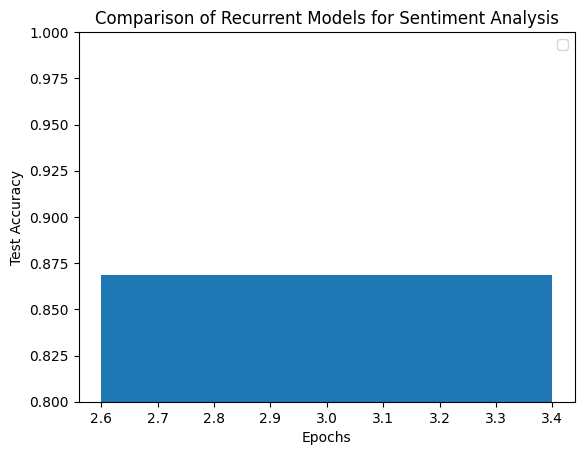

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence

# Set the maximum number of words to consider in the reviews
max_words = 5000

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad the sequences to have the same length
max_length = 250
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

# Lists to store accuracy for each model
accuracies = []

# Models to compare
model_names = ["RNN", "GRU", "LSTM"]

models = [
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        SimpleRNN(64),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        GRU(64),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
]

# Compile and train models
batch_size = 128
epochs = 3

for model in models:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    accuracies.append(accuracy)

# Create a bar plot
plt.bar(epochs, accuracies)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits as needed
plt.show()